## Costs

1 chf per package = 1000 chf \
10 hours/week sorting = 500 chf if delegated \
XX from mislabelled packages

## Benefits

Since all flour is bought at the same price, obviously the higher the quality the better.
The highest quality of flour comes from the two minor mills, and production recipe 2.

![mill](ProductionMill.png)
![recipe](ProductionRecipe.png)

The benefit per package from each mill and recipe is:

Average benefit : 1.03


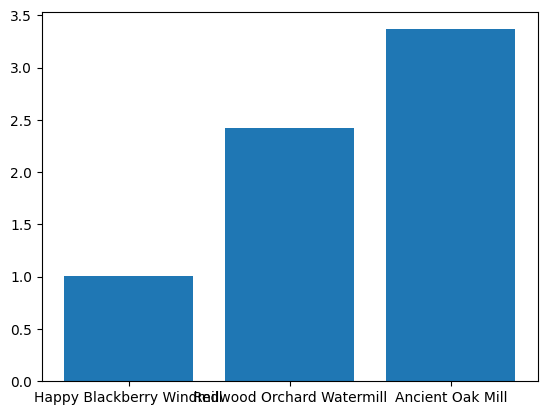

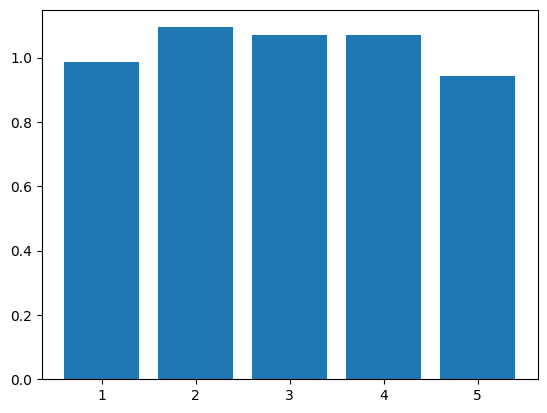

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("flour_dataset.csv")
df = df[df.isnull().sum(1) == 1]

benefits = {'High':5-1, 'Average':2.5-1, 'Low':1.2-1}
df['Benefit'] = df['Quality'].map(benefits)

print(f"Average benefit : {df['Benefit'].mean():.2f}")

mills = df['Production Mill'].unique()
millbenefits = [ df[df['Production Mill']==mill]['Benefit'].mean() for mill in mills]
plt.bar(mills, millbenefits)
plt.show()

recipes = sorted(df['Production Recipe'].unique())
recipebenefits = [df[df['Production Recipe']==recipe]['Benefit'].mean() for recipe in recipes]
plt.bar(recipes, recipebenefits)
plt.show()

With the current mill and recipe fractions, Caroline would need to increase the business by 50% or more to compensate the salary of the asistant

## Automatization of the labelling

A ML model can predict the flour category instantly, saving the need for an additional salary. The categorization is however imperfect and can incur in additional costs from refunds. The accuracy that is achieved with the proof-of-principle models is around 85%.
The 15% misclassification would lead to a cost of 300 chf (assuming the flour is not returned) which is already below the cost of the assistant salary.

![acc](simple/accuracy.png)

Alternatively, the model decision can be used only when the confidence is high, and resort to human action in the ambiguous cases. The misclassification of the model is reduced to about 9%, at the cost of delegating 30% of the decisions.

![sure](simple/NN_output.png)


This would reduce the salary cost down to 150 chf, plus 180 chf of refunds, reducing further the total costs to 330 chf. An improved model performance could further reduce both aspects of the cost.